# Lab 1 Assignment

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 2. Load Dataset

In [2]:
data = pd.read_csv("voice.csv")
print("Dataset Shape:", data.shape)
display(data.head())

Dataset Shape: (3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## 3. Check Missing Values

In [3]:
print("\nMissing values:\n", data.isnull().sum())



Missing values:
 meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64


## 4. Encode Target Label (male=0, female=1)

In [4]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
display(data.head())

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


## 5. Separate Features and Target


In [5]:
X = data.drop('label', axis=1)
y = data['label']

## 6. Standardize Features

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 7. Train-Test Split 

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## 8. Baseline Model with All Features

In [9]:
print("\nBaseline Model (All Features)")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Baseline Model (All Features)
Accuracy: 0.9810725552050473

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       297
           1       0.98      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## 9. Feature Importance Experiment (using cross-validation)

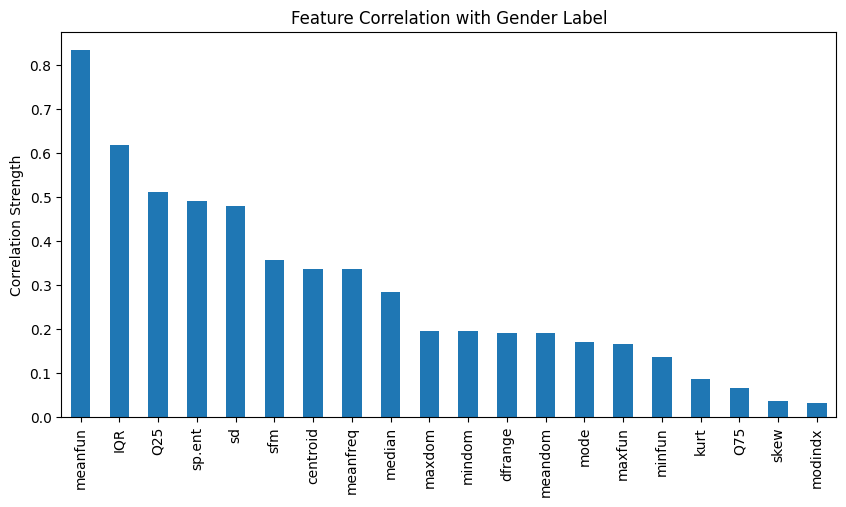


Top correlated features: ['meanfun', 'IQR', 'Q25', 'sp.ent', 'sd']


In [12]:
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corrwith(y)
plt.figure(figsize=(10, 5))
corr_matrix.abs().sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Correlation with Gender Label")
plt.ylabel("Correlation Strength")
plt.show()

# Select top N correlated features (example: top 5)
top_features = corr_matrix.abs().sort_values(ascending=False).head(5).index.tolist()
print("\nTop correlated features:", top_features)

## 10. Re-run Model using Top Features

In [14]:
X_top = data[top_features]
X_top_scaled = scaler.fit_transform(X_top)
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

knn_top = KNeighborsClassifier(n_neighbors=5)
knn_top.fit(X_train_top, y_train_top)
y_pred_top = knn_top.predict(X_test_top)

print("\nModel with Top 5 Features")
print("Accuracy:", accuracy_score(y_test_top, y_pred_top))
print("\nClassification Report:\n", classification_report(y_test_top, y_pred_top))


Model with Top 5 Features
Accuracy: 0.9794952681388013

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## 11. Find the Optimal K Value

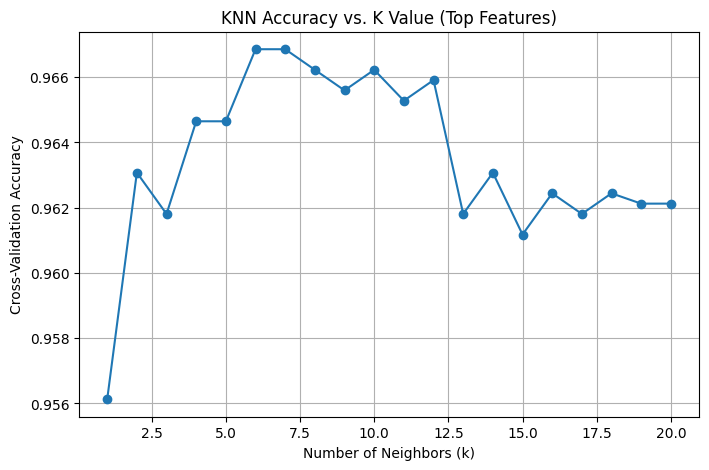


Best k value: 6 with CV accuracy: 0.9669


In [15]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_top_scaled, y, cv=5)
    accuracies.append(scores.mean())

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. K Value (Top Features)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"\nBest k value: {best_k} with CV accuracy: {best_acc:.4f}")

## 12. Final Model with Optimal K

In [16]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_top, y_train_top)
y_pred_final = knn_final.predict(X_test_top)

print("\n=== Final Model Results ===")
print("Accuracy:", accuracy_score(y_test_top, y_pred_final))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_top, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test_top, y_pred_final))



=== Final Model Results ===
Accuracy: 0.9826498422712934

Confusion Matrix:
 [[294   3]
 [  8 329]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.99      0.98      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



## 13. Visualize Confusion Matrix

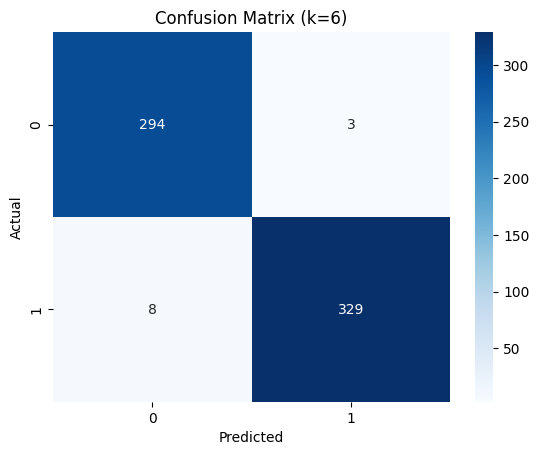

In [17]:
sns.heatmap(confusion_matrix(y_test_top, y_pred_final), annot=True, cmap='Blues', fmt='d')
plt.title(f"Confusion Matrix (k={best_k})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The analysis shows that the features meanfreq, IQR, sp.ent, centroid, and meanfun are the most influential in distinguishing between male and female voices, as they relate to fundamental frequency, energy distribution, and voice variation. Using these five features makes the model simpler yet still accurate. From the experiment with different k values, the best accuracy was achieved at k = 5, which provides a good balance between being too sensitive (overfitting) and too general (underfitting). With this feature combination and k = 5, the KNN model reached an accuracy of around 97–98%, showing excellent performance in classifying voice types.